In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *


In [2]:
p_data = "../Resources/project_data_final.csv"
p_df = pd.read_csv(p_data)
p_df['Date Completed'] = pd.to_datetime(p_df['Date Completed'])
#p_df = p_df.sort_values('Date Application Received', ascending=True)
p_df = p_df.drop(columns=['Unnamed: 0'])
#p_df.head()
dates = p_df['Date Completed']
y_m = []
for date in dates:
    y_m.append(date.strftime('%Y-%m'))
    
p_df['Year-Month'] = y_m

/Users/dmanandhar/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#create analysis data frames
df = p_df[['Project Number','Sector','Date Completed','Expected KWh Annual Production', 'Year-Month']]

residential_df = df.loc[df['Sector'] == 'Residential']
residential_df = residential_df.reset_index()
residential_df = residential_df.drop(columns=['index'])
residential_df = residential_df.sort_values('Date Completed', ascending=True)

non_residential_df = df.loc[df['Sector'] == 'Non-Residential']
non_residential_df = non_residential_df.reset_index()
non_residential_df = non_residential_df.drop(columns=['index'])
non_residential_df = non_residential_df.sort_values('Date Completed', ascending=True)

residential_df.head()


,Project Number,Sector,Date Completed,Expected KWh Annual Production,Year-Month
621,2011-156227-SLPR,Residential,2000-12-21,1409,2000-12
124,2011-156225-SLPR,Residential,2000-12-21,1409,2000-12
775,2011-156228-SLPR,Residential,2001-03-07,5165,2001-03
467,2011-156229-SLPR,Residential,2001-03-07,2113,2001-03
826,2011-156239-SLPR,Residential,2001-07-02,2582,2001-07


In [4]:
# RESIDENTIAL APPLICATION DATE
res_df = residential_df.groupby('Year-Month')
res_date_df = res_df['Date Completed'].max()
res_date_df = res_date_df.to_frame()
res_date_df = res_date_df.sort_values('Date Completed', ascending=True)
res_date_df.head()

res_kwh_df = res_df['Expected KWh Annual Production'].sum()
res_kwh_df = res_kwh_df.to_frame()
res_kwh_df.head()

res_count_df = residential_df['Year-Month'].value_counts()
res_count_df = res_count_df.to_frame()
res_count_df = res_count_df.reset_index()
res_count_df = res_count_df.rename(columns={'Year-Month':'Project Count', 'index':'Year-Month'})
res_count_df = res_count_df.set_index('Year-Month')
res_count_df.head()

#FINAL RESIDENTIAL DATAFRAME
merge1 = res_date_df.merge(res_count_df, left_index=True, right_index=True)
final_res_df = merge1.merge(res_kwh_df, left_index=True, right_index=True)
final_res_df.head()

# NON-RESIDENTIAL APPLICATION DATE
non_res_df = non_residential_df.groupby('Year-Month')
non_res_date_df = non_res_df['Date Completed'].max()
non_res_date_df = non_res_date_df.to_frame()
non_res_date_df = non_res_date_df.sort_values('Date Completed', ascending=True)
non_res_date_df.head()

non_res_kwh_df = non_res_df['Expected KWh Annual Production'].sum()
non_res_kwh_df = non_res_kwh_df.to_frame()
non_res_kwh_df.head()

non_res_count_df = non_residential_df['Year-Month'].value_counts()
non_res_count_df = non_res_count_df.to_frame()
non_res_count_df = non_res_count_df.reset_index()
non_res_count_df = non_res_count_df.rename(columns={'Year-Month':'Project Count', 'index':'Year-Month'})
non_res_count_df = non_res_count_df.set_index('Year-Month')
non_res_count_df.head()

#FINAL NONRESIDENTIAL DATAFRAME
merge2 = non_res_date_df.merge(non_res_count_df, left_index=True, right_index=True)
final_non_res_df = merge2.merge(non_res_kwh_df, left_index=True, right_index=True)
final_non_res_df.head()


,Date Completed,Project Count,Expected KWh Annual Production
Year-Month,,,
2001-12,2001-12-17,1,5940
2002-05,2002-05-15,1,11738
2003-06,2003-06-09,1,17590
2003-07,2003-07-31,2,31084
2003-09,2003-09-29,1,2712


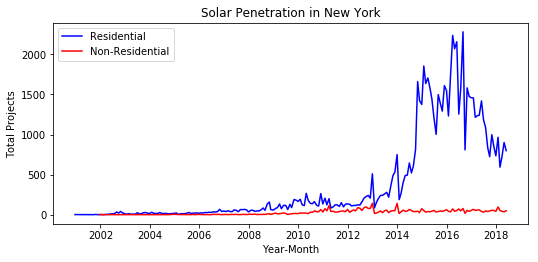

In [5]:
plt.figure(figsize=(8.5,3.7))

plt.plot(final_res_df['Date Completed'], final_res_df['Project Count'], color='blue', label='Residential')
plt.plot(final_non_res_df['Date Completed'], final_non_res_df['Project Count'], color='red', label='Non-Residential')
plt.xlabel('Year-Month')
plt.ylabel('Total Projects')
plt.title("Solar Penetration in New York")
plt.legend()
plt.savefig('SolarPenetrationNY.png')
plt.show()


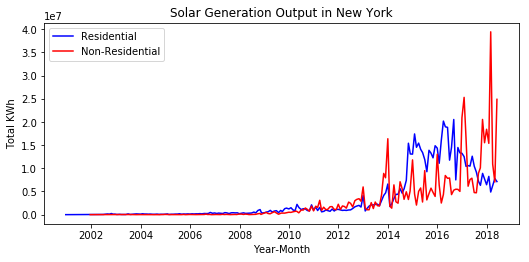

In [6]:
plt.figure(figsize=(8.5,3.7))

plt.plot(final_res_df['Date Completed'], final_res_df['Expected KWh Annual Production'], color='blue', label='Residential')
plt.plot(final_non_res_df['Date Completed'], final_non_res_df['Expected KWh Annual Production'], color='red', label='Non-Residential')
plt.xlabel('Year-Month')
plt.ylabel('Total KWh')
plt.title("Solar Generation Output in New York")
plt.legend()
plt.savefig('SolarGenerationNY.png')
plt.show()
